<a href="https://colab.research.google.com/github/DeimosRecan/NYFlatsAnalysis/blob/main/CK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import random as rnd

from sklearn import tree

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split



from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


%matplotlib inline
sns.set()


df = pd.read_csv('CK.csv')



---


# **Анализ числовых и категориальных признаков (НУЖНО!)**


---



In [ ]:
df

BROKERTITLE                TYPE  \
0           Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                   Brokered by Serhant      Condo for sale   
2                                Brokered by Sowae Corp      House for sale   
3                                   Brokered by COMPASS      Condo for sale   
4     Brokered by Sotheby's International Realty - E...  Townhouse for sale   
...                                                 ...                 ...   
4796                                Brokered by COMPASS      Co-op for sale   
4797                    Brokered by Mjr Real Estate Llc      Co-op for sale   
4798      Brokered by Douglas Elliman - 575 Madison Ave      Co-op for sale   
4799            Brokered by E Realty International Corp      Condo for sale   
4800                 Brokered by Nyc Realty Brokers Llc      Co-op for sale   

          PRICE  BEDS       BATH  PROPERTYSQFT  \
0        315000     2   2.000000   1400.000000   
1     195000000     7  10.000000  17545.000000   
2        260000     4   2.000000   2015.000000   
3         69000     3   1.000000    445.000000   
4      55000000     7   2.373861  14175.000000   
...         ...   ...        ...           ...   
4796     599000     1   1.000000   2184.207862   
4797     245000     1   1.000000   2184.207862   
4798    1275000     1   1.000000   2184.207862   
4799     598125     2   1.000000    655.000000   
4800     349000     1   1.000000    750.000000   

                                                ADDRESS  \
0                                  2 E 55th St Unit 803   
1     Central Park Tower Penthouse-217 W 57th New Yo...   
2                                      620 Sinclair Ave   
3                               2 E 55th St Unit 908W33   
4                                           5 E 64th St   
...                                                 ...   
4796                               222 E 80th St Apt 3A   
4797                                97-40 62 Dr Unit Lg   
4798                          427 W 21st St Unit Garden   
4799                           91-23 Corona Ave Unit 4G   
4800                            460 Neptune Ave Apt 14O   

                        STATE  \
0          New York, NY 10022   
1          New York, NY 10019   
2     Staten Island, NY 10312   
3         Manhattan, NY 10022   
4          New York, NY 10065   
...                       ...   
4796      Manhattan, NY 10075   
4797      Rego Park, NY 11374   
4798       New York, NY 10011   
4799       Elmhurst, NY 11373   
4800       Brooklyn, NY 11224   

                                           MAIN_ADDRESS  \
0                2 E 55th St Unit 803New York, NY 10022   
1     Central Park Tower Penthouse-217 W 57th New Yo...   
2               620 Sinclair AveStaten Island, NY 10312   
3            2 E 55th St Unit 908W33Manhattan, NY 10022   
4                         5 E 64th StNew York, NY 10065   
...                                                 ...   
4796            222 E 80th St Apt 3AManhattan, NY 10075   
4797             97-40 62 Dr Unit LgRego Park, NY 11374   
4798        427 W 21st St Unit GardenNew York, NY 10011   
4799         91-23 Corona Ave Unit 4GElmhurst, NY 11373   
4800          460 Neptune Ave Apt 14OBrooklyn, NY 11224   

     ADMINISTRATIVE_AREA_LEVEL_2         LOCALITY      SUBLOCALITY  \
0                New York County         New York        Manhattan   
1                  United States         New York  New York County   
2                  United States         New York  Richmond County   
3                  United States         New York  New York County   
4                  United States         New York  New York County   
...                          ...              ...              ...   
4796                    New York  New York County         New York   
4797               United States         New York    Queens County   
4798               United States         New York

In [ ]:
df.describe(include=['O'])

BROKERTITLE            TYPE          ADDRESS  \
count                  4801            4801             4801   
unique                 1036              13             4582   
top     Brokered by COMPASS  Co-op for sale  2619 Shore Pkwy   
freq                    456            1450                3   

                     STATE                       MAIN_ADDRESS  \
count                 4801                               4801   
unique                 308                               4583   
top     Brooklyn, NY 11235  2619 Shore PkwyBrooklyn, NY 11223   
freq                   102                                  3   

       ADMINISTRATIVE_AREA_LEVEL_2  LOCALITY SUBLOCALITY STREET_NAME  \
count                         4801      4801        4801        4801   
unique                          29        11          21         174   
top                  United States  New York    New York   Manhattan   
freq                          2484      2505        1016         979   

       LONG_NAME                                  FORMATTED_ADDRESS  
count       4801                                               4801  
unique      2731                                               4550  
top            2  61-20 Grand Central Pkwy, Forest Hills, NY 113...  
freq          20                                                  4

In [ ]:
df.describe()

PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4.801000e+03  4801.000000  4801.000000   4801.000000  4801.000000   
mean   2.356940e+06     3.356801     2.373861   2184.207862    40.714227   
std    3.135525e+07     2.602315     1.946962   2377.140894     0.087676   
min    2.494000e+03     1.000000     0.000000    230.000000    40.499546   
25%    4.990000e+05     2.000000     1.000000   1200.000000    40.639375   
50%    8.250000e+05     3.000000     2.000000   2184.207862    40.726749   
75%    1.495000e+06     4.000000     3.000000   2184.207862    40.771923   
max    2.147484e+09    50.000000    50.000000  65535.000000    40.912729   

         LONGITUDE  
count  4801.000000  
mean    -73.941601  
std       0.101082  
min     -74.253033  
25%     -73.987143  
50%     -73.949189  
75%     -73.870638  
max     -73.702450



---


# **Анализ дубликатов и пустот (НУЖНО!)**


---



In [ ]:
df

BROKERTITLE                TYPE  \
0           Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                   Brokered by Serhant      Condo for sale   
2                                Brokered by Sowae Corp      House for sale   
3                                   Brokered by COMPASS      Condo for sale   
4     Brokered by Sotheby's International Realty - E...  Townhouse for sale   
...                                                 ...                 ...   
4796                                Brokered by COMPASS      Co-op for sale   
4797                    Brokered by Mjr Real Estate Llc      Co-op for sale   
4798      Brokered by Douglas Elliman - 575 Madison Ave      Co-op for sale   
4799            Brokered by E Realty International Corp      Condo for sale   
4800                 Brokered by Nyc Realty Brokers Llc      Co-op for sale   

          PRICE  BEDS       BATH  PROPERTYSQFT  \
0        315000     2   2.000000   1400.000000   
1     195000000     7  10.000000  17545.000000   
2        260000     4   2.000000   2015.000000   
3         69000     3   1.000000    445.000000   
4      55000000     7   2.373861  14175.000000   
...         ...   ...        ...           ...   
4796     599000     1   1.000000   2184.207862   
4797     245000     1   1.000000   2184.207862   
4798    1275000     1   1.000000   2184.207862   
4799     598125     2   1.000000    655.000000   
4800     349000     1   1.000000    750.000000   

                                                ADDRESS  \
0                                  2 E 55th St Unit 803   
1     Central Park Tower Penthouse-217 W 57th New Yo...   
2                                      620 Sinclair Ave   
3                               2 E 55th St Unit 908W33   
4                                           5 E 64th St   
...                                                 ...   
4796                               222 E 80th St Apt 3A   
4797                                97-40 62 Dr Unit Lg   
4798                          427 W 21st St Unit Garden   
4799                           91-23 Corona Ave Unit 4G   
4800                            460 Neptune Ave Apt 14O   

                        STATE  \
0          New York, NY 10022   
1          New York, NY 10019   
2     Staten Island, NY 10312   
3         Manhattan, NY 10022   
4          New York, NY 10065   
...                       ...   
4796      Manhattan, NY 10075   
4797      Rego Park, NY 11374   
4798       New York, NY 10011   
4799       Elmhurst, NY 11373   
4800       Brooklyn, NY 11224   

                                           MAIN_ADDRESS  \
0                2 E 55th St Unit 803New York, NY 10022   
1     Central Park Tower Penthouse-217 W 57th New Yo...   
2               620 Sinclair AveStaten Island, NY 10312   
3            2 E 55th St Unit 908W33Manhattan, NY 10022   
4                         5 E 64th StNew York, NY 10065   
...                                                 ...   
4796            222 E 80th St Apt 3AManhattan, NY 10075   
4797             97-40 62 Dr Unit LgRego Park, NY 11374   
4798        427 W 21st St Unit GardenNew York, NY 10011   
4799         91-23 Corona Ave Unit 4GElmhurst, NY 11373   
4800          460 Neptune Ave Apt 14OBrooklyn, NY 11224   

     ADMINISTRATIVE_AREA_LEVEL_2         LOCALITY      SUBLOCALITY  \
0                New York County         New York        Manhattan   
1                  United States         New York  New York County   
2                  United States         New York  Richmond County   
3                  United States         New York  New York County   
4                  United States         New York  New York County   
...                          ...              ...              ...   
4796                    New York  New York County         New York   
4797               United States         New York    Queens County   
4798               United States         New York

In [ ]:
df = df.drop_duplicates(keep=False) # 4374 - 4002 = 372

In [ ]:
for name in list(df.columns):
    print(f'{name}: {int(df[[name]].isnull().sum()) / len(df) * 100:.2f}%')

BROKERTITLE: 0.00%
TYPE: 0.00%
PRICE: 0.00%
BEDS: 0.00%
BATH: 0.00%
PROPERTYSQFT: 0.00%
ADDRESS: 0.00%
STATE: 0.00%
MAIN_ADDRESS: 0.00%
ADMINISTRATIVE_AREA_LEVEL_2: 0.00%
LOCALITY: 0.00%
SUBLOCALITY: 0.00%
STREET_NAME: 0.00%
LONG_NAME: 0.00%
FORMATTED_ADDRESS: 0.00%
LATITUDE: 0.00%
LONGITUDE: 0.00%


<ipython-input-7-2861180392e6>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f'{name}: {int(df[[name]].isnull().sum()) / len(df) * 100:.2f}%')
<ipython-input-7-2861180392e6>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f'{name}: {int(df[[name]].isnull().sum()) / len(df) * 100:.2f}%')
<ipython-input-7-2861180392e6>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f'{name}: {int(df[[name]].isnull().sum()) / len(df) * 100:.2f}%')
<ipython-input-7-2861180392e6>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f'{name}: {int(df[[name]].isnull().sum()) / len(df) * 100:.2f}%')
<ipython-inp



---


# **Анализ аномалий (НУЖНО!)**


---



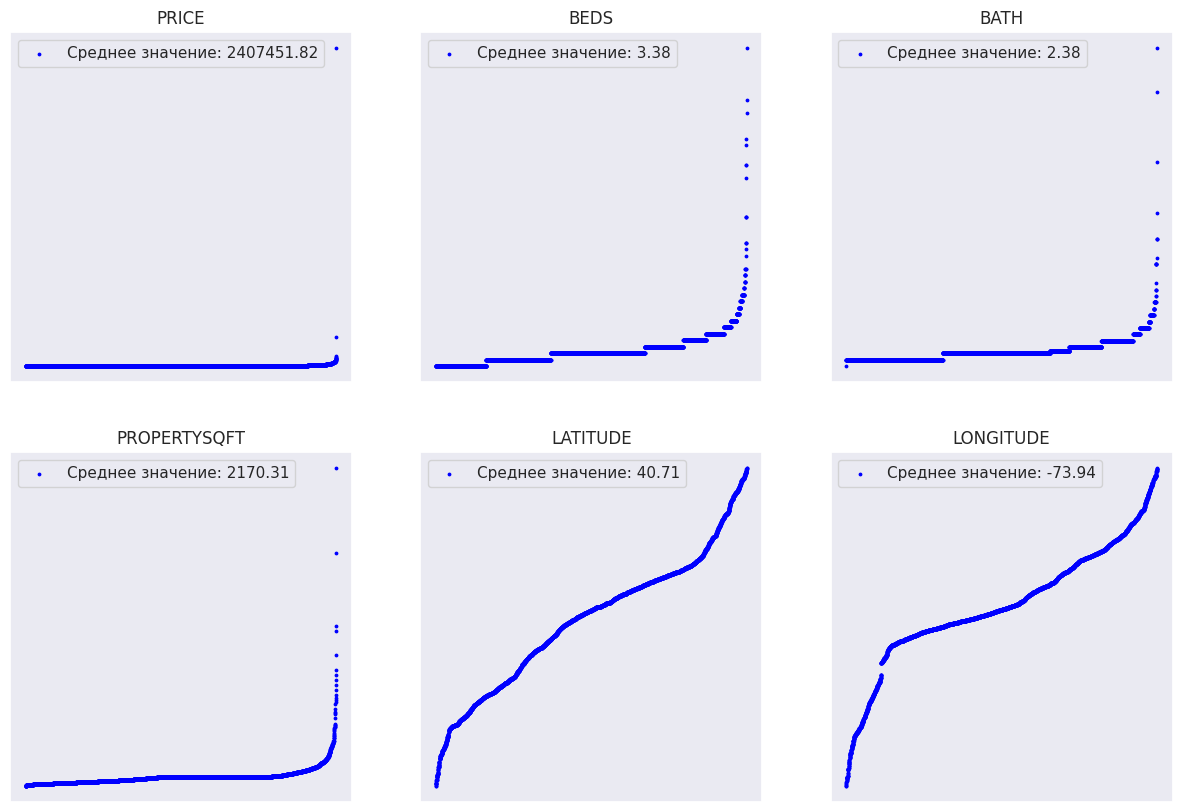

In [ ]:
from pandas.api.types import is_string_dtype


num_property_list = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']

fig, ax = plt.subplots(2, 3)
fig.set_figwidth(15)
fig.set_figheight(10)
r
for i in range(3):
    for j in range(2):
        ax[j][i].scatter(x=list(df.index), y=sorted(list(df[num_property_list[j * 3 + i]])), c='blue', s=3)
        ax[j][i].set_title(num_property_list[j * 3 + i])
        ax[j][i].legend([f'Среднее значение: {st.mean(list(df[num_property_list[j * 3 + i]])):.2f}'])
        ax[j][i].set_xticks([], [])
        ax[j][i].set_yticks([])


In [ ]:
df.drop(list(df[df['PRICE'] > 15000000].index), axis = 0, inplace = True)
df.drop(list(df[df['BEDS'] > 17].index), axis = 0, inplace = True)
df.drop(list(df[(df['BATH'] > 2) & (df['BATH'] < 3)].index), axis = 0, inplace = True)
df.drop(list(df[df['BATH'] > 15].index), axis = 0, inplace = True)
df.drop(list(df[df['PROPERTYSQFT'] > 7000].index), axis = 0, inplace = True)



---


# **Зависимость кол-ва ванных комнат от спален (НЕ ОСОБО НУЖНО!)**


---



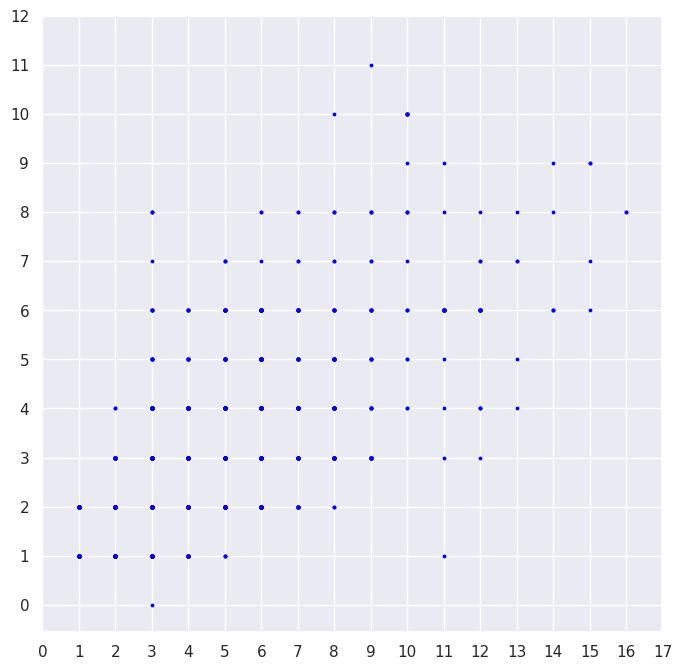

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(8)

ax.scatter(x=df['BEDS'], y=df['BATH'], c='blue', s=3)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

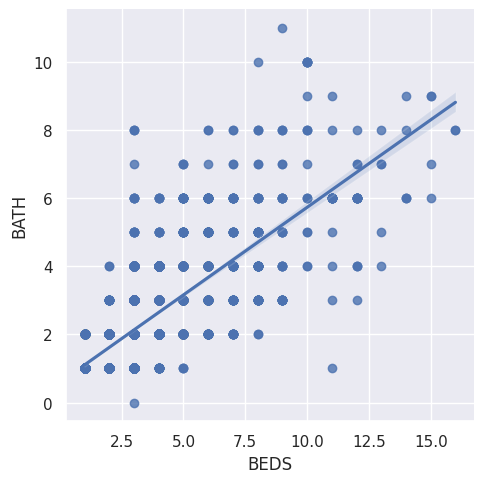

In [ ]:
sns.lmplot(x='BEDS', y='BATH', data=df)



---


# **Анализ категориальных свойств (НУЖНО!)**


---



In [ ]:
del df['FORMATTED_ADDRESS']
del df['LONG_NAME']
del df['STREET_NAME']
del df['SUBLOCALITY']
del df['LOCALITY']
del df['ADMINISTRATIVE_AREA_LEVEL_2']
del df['MAIN_ADDRESS']
del df['STATE']
del df['ADDRESS']

In [ ]:
series = df['TYPE'].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(series)

TYPE
Co-op for sale                1311
House for sale                 819
Condo for sale                 759
Multi-family home for sale     594
Townhouse for sale             199
Pending                        198
Contingent                      84
For sale                        19
Foreclosure                     12
Condop for sale                  3
Coming Soon                      2
Land for sale                    1
Mobile house for sale            1
Name: count, dtype: int64

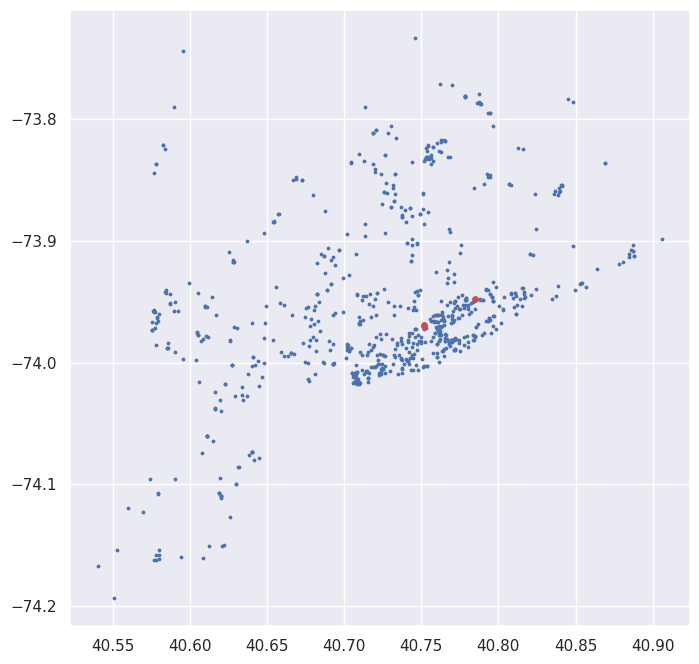

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(8)

ax.scatter(x=df[df['TYPE'].isin(['Condo for sale'])]['LATITUDE'], y=df[df['TYPE'].isin(['Condo for sale'])]['LONGITUDE'], c='b', s=3)
ax.scatter(x=df[df['TYPE'].isin(['Condop for sale'])]['LATITUDE'], y=df[df['TYPE'].isin(['Condop for sale'])]['LONGITUDE'], c='r', s=15)

In [ ]:
df.loc[df['TYPE'] == 'Condop for sale', 'TYPE'] = 'Condo for sale'

In [ ]:
df.drop(list(df[df['TYPE'].isin(list(series[series.values < 20].index))].index), axis = 0, inplace = True)

<ipython-input-14-406f78ca6d36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(list(df[df['TYPE'].isin(list(series[series.values < 20].index))].index), axis = 0, inplace = True)


In [ ]:
series = df['BROKERTITLE'].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(series[series.values > 20])

BROKERTITLE
Brokered by COMPASS                                                           368
Brokered by Douglas Elliman - 575 Madison Ave                                  94
Brokered by Brown Harris Stevens                                               89
Brokered by Corcoran East Side                                                 66
Brokered by RE MAX Edge                                                        65
Brokered by Winzone Realty Inc                                                 57
Brokered by E Realty International Corp                                        54
Brokered by Exp Realty                                                         43
Brokered by Sotheby's International Realty - East Side Manhattan Brokerage     42
Brokered by RE MAX Real Estate Professionals                                   40
Brokered by EXP Realty                                                         40
Brokered by Keller Williams NYC                                                38
Brok

In [ ]:
print(len(list(map(lambda x: x.lower(), list(series.index)))))
print(len(set(list(map(lambda x: x.lower(), list(series.index))))))

944
922


In [ ]:
df.drop(list(df[df['BROKERTITLE'].isin(['NoBroker'])].index), axis = 0, inplace = True)

<ipython-input-17-ea6a4e3d7fd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(list(df[df['BROKERTITLE'].isin(['NoBroker'])].index), axis = 0, inplace = True)


In [ ]:
unic_broker = {}

for broker in list(df['BROKERTITLE']):
    if broker.lower() not in unic_broker.keys():
        unic_broker[broker.lower()] = broker
    else:
        df.loc[df['BROKERTITLE'] == broker, 'BROKERTITLE'] = unic_broker[broker.lower()]


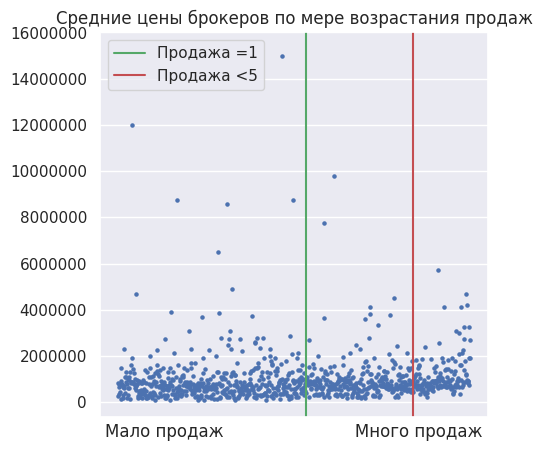

In [ ]:
series = list(df['BROKERTITLE'].value_counts().index)
series.reverse()

y = list(st.mean(df[df['BROKERTITLE'].isin([series[num]])]['PRICE']) for num in range(len(series)))

fig, ax = plt.subplots(1, 1)
fig.set_figwidth(5)
fig.set_figheight(5)

series = df['BROKERTITLE'].value_counts()
ax.scatter(x=[x for x in range(len(y))], y=y, c='b', s=5)

ax.set_yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000,
           14000000, 16000000])
ax.set_xticks([])

ax.set_xlabel(f'Мало продаж                         Много продаж')
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
ax.set_title('Средние цены брокеров по мере возрастания продаж')

plt.axvline(x = 490, color = 'g', label = 'Продажа =1')
plt.axvline(x = 770, color = 'r', label = 'Продажа <5')

plt.legend()



---


# **Ценовой диапазон по расположению жилья (НЕ ОСОБО НУЖНО!)**


---



In [ ]:
df

BROKERTITLE            TYPE    PRICE  \
0       Brokered by Douglas Elliman  -111 Fifth Ave  Condo for sale   315000   
2                            Brokered by Sowae Corp  House for sale   260000   
3                               Brokered by COMPASS  Condo for sale    69000   
5                            Brokered by Sowae Corp  House for sale   690000   
6     Brokered by Douglas Elliman - 575 Madison Ave  Condo for sale   899500   
...                                             ...             ...      ...   
4796                            Brokered by COMPASS  Co-op for sale   599000   
4797                Brokered by Mjr Real Estate Llc  Co-op for sale   245000   
4798  Brokered by Douglas Elliman - 575 Madison Ave  Co-op for sale  1275000   
4799        Brokered by E Realty International Corp  Condo for sale   598125   
4800             Brokered by Nyc Realty Brokers Llc  Co-op for sale   349000   

      BEDS  BATH  PROPERTYSQFT   LATITUDE  LONGITUDE  
0        2   2.0   1400.000000  40.761255 -73.974483  
2        4   2.0   2015.000000  40.541805 -74.196109  
3        3   1.0    445.000000  40.761398 -73.974613  
5        5   2.0   4004.000000  40.674363 -73.958725  
6        2   2.0   2184.207862  40.809448 -73.946777  
...    ...   ...           ...        ...        ...  
4796     1   1.0   2184.207862  40.774350 -73.955879  
4797     1   1.0   2184.207862  40.732538 -73.860152  
4798     1   1.0   2184.207862  40.745882 -74.003398  
4799     2   1.0    655.000000  40.742770 -73.872752  
4800     1   1.0    750.000000  40.579147 -73.970949  

[3940 rows x 8 columns]

In [ ]:
stat_df = df[df['TYPE'] == 'Co-op for sale'].copy()
fig = go.Figure(go.Scattermapbox(lat=stat_df['LATITUDE'],
                                 lon=stat_df['LONGITUDE'],
                                 text='Фирма брокера: ' + stat_df['BROKERTITLE'] + '<br>' \
                                 + 'Количество спален: ' + stat_df['BEDS'].astype(str) + '<br>' \
                                 + 'Количество ванных: ' + stat_df['BATH'].astype(int).astype(str) + '<br>' \
                                 + 'Площадь: ' + stat_df['PROPERTYSQFT'].astype(str) + '<br>' \
                                 + 'Цена: ' + stat_df['PRICE'].astype(str) + '$',
                                 marker=dict(colorbar=dict(title='Цена',
                                                           ticktext=['Низкая цена', 'Высокая цена'],
                                                           tickvals=[5, 7]),
                                             color=np.log10(stat_df['PRICE']),
                                             size=np.log10(stat_df['PRICE']))))

map_center = go.layout.mapbox.Center(lat=(stat_df['LATITUDE'].max()+stat_df['LATITUDE'].min())/2,
                                     lon=(stat_df['LONGITUDE'].max()+stat_df['LONGITUDE'].min())/2)

fig.update_layout(legend_orientation='h',
                  mapbox_style='carto-positron',
                  mapbox=dict(center=map_center, zoom=10),
                  margin={"r":0,"t":0,"l":0,"b":0},
                  hoverlabel=dict(bgcolor="white",
                                  font_size=16,
                                  font_family="Inter"))
fig.show()


In [ ]:
stat_df = df[df['TYPE'] == 'Condo for sale'].copy()
fig = go.Figure(go.Scattermapbox(lat=stat_df['LATITUDE'],
                                 lon=stat_df['LONGITUDE'],
                                 text='Фирма брокера: ' + stat_df['BROKERTITLE'] + '<br>' \
                                 + 'Количество спален: ' + stat_df['BEDS'].astype(str) + '<br>' \
                                 + 'Количество ванных: ' + stat_df['BATH'].astype(int).astype(str) + '<br>' \
                                 + 'Площадь: ' + stat_df['PROPERTYSQFT'].astype(str) + '<br>' \
                                 + 'Цена: ' + stat_df['PRICE'].astype(str) + '$',
                                 marker=dict(colorbar=dict(title='Цена',
                                                           ticktext=['Низкая цена', 'Высокая цена'],
                                                           tickvals=[5, 7]),
                                             color=np.log10(stat_df['PRICE']),
                                             size=np.log10(stat_df['PRICE']))))

map_center = go.layout.mapbox.Center(lat=(stat_df['LATITUDE'].max()+stat_df['LATITUDE'].min())/2,
                                     lon=(stat_df['LONGITUDE'].max()+stat_df['LONGITUDE'].min())/2)

fig.update_layout(legend_orientation='h',
                  mapbox_style='carto-positron',
                  mapbox=dict(center=map_center, zoom=10),
                  margin={"r":0,"t":0,"l":0,"b":0},
                  hoverlabel=dict(bgcolor="white",
                                  font_size=16,
                                  font_family="Inter"))
fig.show()


In [ ]:
stat_df = df[df['TYPE'] == 'Contingent'].copy()
fig = go.Figure(go.Scattermapbox(lat=stat_df['LATITUDE'],
                                 lon=stat_df['LONGITUDE'],
                                 text='Фирма брокера: ' + stat_df['BROKERTITLE'] + '<br>' \
                                 + 'Количество спален: ' + stat_df['BEDS'].astype(str) + '<br>' \
                                 + 'Количество ванных: ' + stat_df['BATH'].astype(int).astype(str) + '<br>' \
                                 + 'Площадь: ' + stat_df['PROPERTYSQFT'].astype(str) + '<br>' \
                                 + 'Цена: ' + stat_df['PRICE'].astype(str) + '$',
                                 marker=dict(colorbar=dict(title='Цена',
                                                           ticktext=['Низкая цена', 'Высокая цена'],
                                                           tickvals=[5.47, 7]),
                                             color=np.log10(stat_df['PRICE']),
                                             size=np.log10(stat_df['PRICE']))))

map_center = go.layout.mapbox.Center(lat=(stat_df['LATITUDE'].max()+stat_df['LATITUDE'].min())/2,
                                     lon=(stat_df['LONGITUDE'].max()+stat_df['LONGITUDE'].min())/2)

fig.update_layout(legend_orientation='h',
                  mapbox_style='carto-positron',
                  mapbox=dict(center=map_center, zoom=10),
                  margin={"r":0,"t":0,"l":0,"b":0},
                  hoverlabel=dict(bgcolor="white",
                                  font_size=16,
                                  font_family="Inter"))
fig.show()


In [ ]:
stat_df = df[df['TYPE'] == 'House for sale'].copy()
fig = go.Figure(go.Scattermapbox(lat=stat_df['LATITUDE'],
                                 lon=stat_df['LONGITUDE'],
                                 text='Фирма брокера: ' + stat_df['BROKERTITLE'] + '<br>' \
                                 + 'Количество спален: ' + stat_df['BEDS'].astype(str) + '<br>' \
                                 + 'Количество ванных: ' + stat_df['BATH'].astype(int).astype(str) + '<br>' \
                                 + 'Площадь: ' + stat_df['PROPERTYSQFT'].astype(str) + '<br>' \
                                 + 'Цена: ' + stat_df['PRICE'].astype(str) + '$',
                                 marker=dict(colorbar=dict(title='Цена',
                                                           ticktext=['Низкая цена', 'Высокая цена'],
                                                           tickvals=[5.41, 7]),
                                             color=np.log10(stat_df['PRICE']),
                                             size=np.log10(stat_df['PRICE']))))

map_center = go.layout.mapbox.Center(lat=(stat_df['LATITUDE'].max()+stat_df['LATITUDE'].min())/2,
                                     lon=(stat_df['LONGITUDE'].max()+stat_df['LONGITUDE'].min())/2)

fig.update_layout(legend_orientation='h',
                  mapbox_style='carto-positron',
                  mapbox=dict(center=map_center, zoom=10),
                  margin={"r":0,"t":0,"l":0,"b":0},
                  hoverlabel=dict(bgcolor="white",
                                  font_size=16,
                                  font_family="Inter"))
fig.show()


In [ ]:
stat_df = df[df['TYPE'] == 'Multi-family home for sale'].copy()
fig = go.Figure(go.Scattermapbox(lat=stat_df['LATITUDE'],
                                 lon=stat_df['LONGITUDE'],
                                 text='Фирма брокера: ' + stat_df['BROKERTITLE'] + '<br>' \
                                 + 'Количество спален: ' + stat_df['BEDS'].astype(str) + '<br>' \
                                 + 'Количество ванных: ' + stat_df['BATH'].astype(int).astype(str) + '<br>' \
                                 + 'Площадь: ' + stat_df['PROPERTYSQFT'].astype(str) + '<br>' \
                                 + 'Цена: ' + stat_df['PRICE'].astype(str) + '$',
                                 marker=dict(colorbar=dict(title='Цена',
                                                           ticktext=['Низкая цена', 'Высокая цена'],
                                                           tickvals=[5.58, 6.87]),
                                             color=np.log10(stat_df['PRICE']),
                                             size=np.log10(stat_df['PRICE']))))

map_center = go.layout.mapbox.Center(lat=(stat_df['LATITUDE'].max()+stat_df['LATITUDE'].min())/2,
                                     lon=(stat_df['LONGITUDE'].max()+stat_df['LONGITUDE'].min())/2)

fig.update_layout(legend_orientation='h',
                  mapbox_style='carto-positron',
                  mapbox=dict(center=map_center, zoom=10),
                  margin={"r":0,"t":0,"l":0,"b":0},
                  hoverlabel=dict(bgcolor="white",
                                  font_size=16,
                                  font_family="Inter"))
fig.show()


In [ ]:
stat_df = df[df['TYPE'] == 'Pending'].copy()
fig = go.Figure(go.Scattermapbox(lat=stat_df['LATITUDE'],
                                 lon=stat_df['LONGITUDE'],
                                 text='Фирма брокера: ' + stat_df['BROKERTITLE'] + '<br>' \
                                 + 'Количество спален: ' + stat_df['BEDS'].astype(str) + '<br>' \
                                 + 'Количество ванных: ' + stat_df['BATH'].astype(int).astype(str) + '<br>' \
                                 + 'Площадь: ' + stat_df['PROPERTYSQFT'].astype(str) + '<br>' \
                                 + 'Цена: ' + stat_df['PRICE'].astype(str) + '$',
                                 marker=dict(colorbar=dict(title='Цена',
                                                           ticktext=['Низкая цена', 'Высокая цена'],
                                                           tickvals=[5.25, 6.95]),
                                             color=np.log10(stat_df['PRICE']),
                                             size=np.log10(stat_df['PRICE']))))

map_center = go.layout.mapbox.Center(lat=(stat_df['LATITUDE'].max()+stat_df['LATITUDE'].min())/2,
                                     lon=(stat_df['LONGITUDE'].max()+stat_df['LONGITUDE'].min())/2)

fig.update_layout(legend_orientation='h',
                  mapbox_style='carto-positron',
                  mapbox=dict(center=map_center, zoom=10),
                  margin={"r":0,"t":0,"l":0,"b":0},
                  hoverlabel=dict(bgcolor="white",
                                  font_size=16,
                                  font_family="Inter"))
fig.show()


In [ ]:
stat_df = df[df['TYPE'] == 'Townhouse for sale'].copy()
fig = go.Figure(go.Scattermapbox(lat=stat_df['LATITUDE'],
                                 lon=stat_df['LONGITUDE'],
                                 text='Фирма брокера: ' + stat_df['BROKERTITLE'] + '<br>' \
                                 + 'Количество спален: ' + stat_df['BEDS'].astype(str) + '<br>' \
                                 + 'Количество ванных: ' + stat_df['BATH'].astype(int).astype(str) + '<br>' \
                                 + 'Площадь: ' + stat_df['PROPERTYSQFT'].astype(str) + '<br>' \
                                 + 'Цена: ' + stat_df['PRICE'].astype(str) + '$',
                                 marker=dict(colorbar=dict(title='Цена',
                                                           ticktext=['Низкая цена', 'Высокая цена'],
                                                           tickvals=[5.71, 7]),
                                             color=np.log10(stat_df['PRICE']),
                                             size=np.log10(stat_df['PRICE']))))

map_center = go.layout.mapbox.Center(lat=(stat_df['LATITUDE'].max()+stat_df['LATITUDE'].min())/2,
                                     lon=(stat_df['LONGITUDE'].max()+stat_df['LONGITUDE'].min())/2)

fig.update_layout(legend_orientation='h',
                  mapbox_style='carto-positron',
                  mapbox=dict(center=map_center, zoom=10),
                  margin={"r":0,"t":0,"l":0,"b":0},
                  hoverlabel=dict(bgcolor="white",
                                  font_size=16,
                                  font_family="Inter"))
fig.show()


In [ ]:
df

BROKERTITLE            TYPE    PRICE  \
0       Brokered by Douglas Elliman  -111 Fifth Ave  Condo for sale   315000   
2                            Brokered by Sowae Corp  House for sale   260000   
3                               Brokered by COMPASS  Condo for sale    69000   
5                            Brokered by Sowae Corp  House for sale   690000   
6     Brokered by Douglas Elliman - 575 Madison Ave  Condo for sale   899500   
...                                             ...             ...      ...   
4796                            Brokered by COMPASS  Co-op for sale   599000   
4797                Brokered by Mjr Real Estate Llc  Co-op for sale   245000   
4798  Brokered by Douglas Elliman - 575 Madison Ave  Co-op for sale  1275000   
4799        Brokered by E Realty International Corp  Condo for sale   598125   
4800             Brokered by Nyc Realty Brokers Llc  Co-op for sale   349000   

      BEDS  BATH  PROPERTYSQFT   LATITUDE  LONGITUDE  
0        2   2.0   1400.000000  40.761255 -73.974483  
2        4   2.0   2015.000000  40.541805 -74.196109  
3        3   1.0    445.000000  40.761398 -73.974613  
5        5   2.0   4004.000000  40.674363 -73.958725  
6        2   2.0   2184.207862  40.809448 -73.946777  
...    ...   ...           ...        ...        ...  
4796     1   1.0   2184.207862  40.774350 -73.955879  
4797     1   1.0   2184.207862  40.732538 -73.860152  
4798     1   1.0   2184.207862  40.745882 -74.003398  
4799     2   1.0    655.000000  40.742770 -73.872752  
4800     1   1.0    750.000000  40.579147 -73.970949  

[3940 rows x 8 columns]



---


# **Кодировка категориальных свойств (НУЖНО!)**


---



In [ ]:
df_copy = df.copy(deep=True)

In [ ]:
enc = OrdinalEncoder()
df[['BROKERTITLE']] = enc.fit_transform(df[['BROKERTITLE']])

<ipython-input-21-e232c2e669c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['BROKERTITLE']] = enc.fit_transform(df[['BROKERTITLE']])


In [ ]:
enc = OneHotEncoder()
res = enc.fit_transform(df[['TYPE']])
df[enc.categories_[0]] = res.toarray()
del df['TYPE']

<ipython-input-22-16a68e7d70a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[enc.categories_[0]] = res.toarray()
<ipython-input-22-16a68e7d70a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[enc.categories_[0]] = res.toarray()
<ipython-input-22-16a68e7d70a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
with pd.option_context('display.max_columns', None):
    display(df)

BROKERTITLE    PRICE  BEDS  BATH  PROPERTYSQFT   LATITUDE  LONGITUDE  \
0           263.0   315000     2   2.0   1400.000000  40.761255 -73.974483   
2           821.0   260000     4   2.0   2015.000000  40.541805 -74.196109   
3           154.0    69000     3   1.0    445.000000  40.761398 -73.974613   
5           821.0   690000     5   2.0   4004.000000  40.674363 -73.958725   
6           274.0   899500     2   2.0   2184.207862  40.809448 -73.946777   
...           ...      ...   ...   ...           ...        ...        ...   
4796        154.0   599000     1   1.0   2184.207862  40.774350 -73.955879   
4797        586.0   245000     1   1.0   2184.207862  40.732538 -73.860152   
4798        274.0  1275000     1   1.0   2184.207862  40.745882 -74.003398   
4799        301.0   598125     2   1.0    655.000000  40.742770 -73.872752   
4800        641.0   349000     1   1.0    750.000000  40.579147 -73.970949   

      Co-op for sale  Condo for sale  Contingent  House for sale  \
0                0.0             1.0         0.0             0.0   
2                0.0             0.0         0.0             1.0   
3                0.0             1.0         0.0             0.0   
5                0.0             0.0         0.0             1.0   
6                0.0             1.0         0.0             0.0   
...              ...             ...         ...             ...   
4796             1.0             0.0         0.0             0.0   
4797             1.0             0.0         0.0             0.0   
4798             1.0             0.0         0.0             0.0   
4799             0.0             1.0         0.0             0.0   
4800             1.0             0.0         0.0             0.0   

      Multi-family home for sale  Pending  Townhouse for sale  
0                            0.0      0.0                 0.0  
2                            0.0      0.0                 0.0  
3                            0.0      0.0                 0.0  
5                            0.0      0.0                 0.0  
6                            0.0      0.0                 0.0  
...                          ...      ...                 ...  
4796                         0.0      0.0                 0.0  
4797                         0.0      0.0                 0.0  
4798                         0.0      0.0                 0.0  
4799                         0.0      0.0                 0.0  
4800                         0.0      0.0                 0.0  

[3940 rows x 14 columns]



---


# **Тепловая карта (НУЖНО!)**


---



<Axes: >

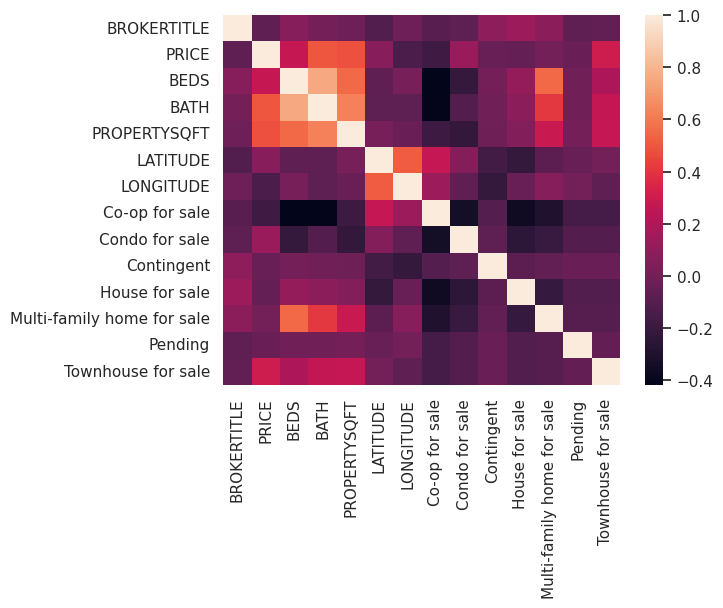

In [ ]:
sns.heatmap(df.corr())



---


# **1 Метод**
# **Регрессия (Работает)**
# **Полиномиальная**


---



R2 score:  0.6354562705802621
Mean squared error:  1208005072731.7632


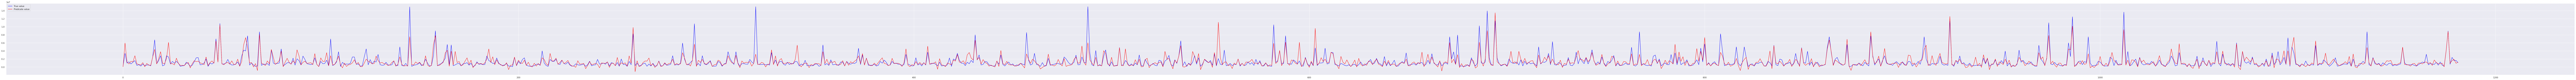

In [ ]:
scaler_mm = MinMaxScaler()
scaler_s = StandardScaler()

x_col = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE', 'Condo for sale']

x = df[x_col].copy(deep=True)
y = df['PRICE'].copy(deep=True)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=57)

x_train = scaler_mm.fit_transform(x_train, y_train)
x_test = scaler_mm.transform(x_test)

poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x_train)
poly_model = LinearRegression()
poly_model.fit(x_poly, y_train)

x_test_poly = poly_features.fit_transform(x_test)

y_pred = poly_model.predict(x_test_poly)

print('R2 score: ', r2_score(y_test, y_pred))
print('Mean squared error: ', mean_squared_error(y_test, y_pred))

fig, ax = plt.subplots()
fig.set_figwidth(250)
fig.set_figheight(7)

ax.plot(range(len(y_test)), y_test, c='blue')
ax.plot(range(len(y_pred)), y_pred, c='red')
ax.legend(['True value', 'Predicate value'], loc='upper left')

fig.show()



---


# **2 Метод**
# **Классификация (Не работает)**
# **Наивный Байес (Гаусс и Многочленный)**


---



In [ ]:
df = df_copy.copy(deep=True)

In [ ]:
enc = OrdinalEncoder()
df[['BROKERTITLE']] = enc.fit_transform(df[['BROKERTITLE']])

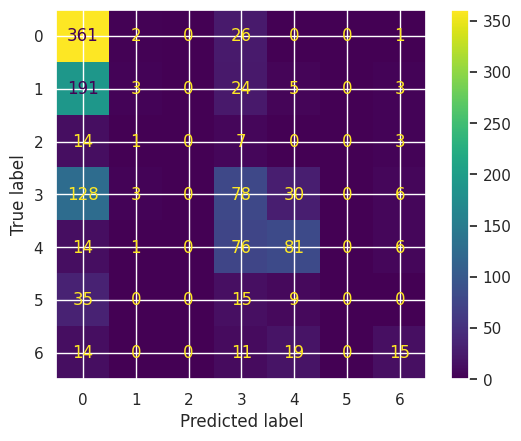

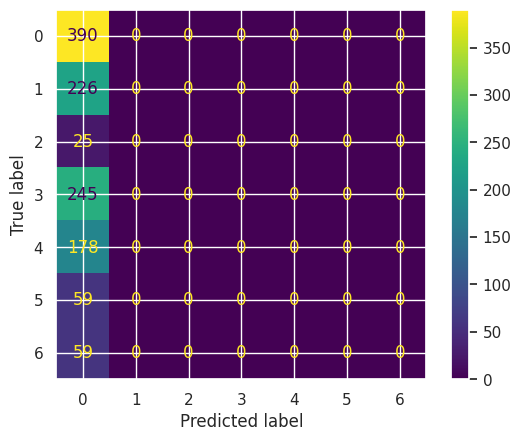

In [ ]:
x_col = ['BEDS', 'BATH', 'PROPERTYSQFT']

x = df[x_col].copy(deep=True)
y = df['TYPE'].copy(deep=True)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=57, stratify=y)

x_train = scaler_mm.fit_transform(x_train, y_train)
x_test = scaler_mm.transform(x_test)

gnb = GaussianNB()
mnb = MultinomialNB()

y_pred_gnb = gnb.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test, y_pred_gnb)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

y_pred_mnb = mnb.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test, y_pred_mnb)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


In [ ]:
print(classification_report(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_mnb))

                            precision    recall  f1-score   support

            Co-op for sale       0.48      0.93      0.63       390
            Condo for sale       0.30      0.01      0.03       226
                Contingent       0.00      0.00      0.00        25
            House for sale       0.33      0.32      0.32       245
Multi-family home for sale       0.56      0.46      0.50       178
                   Pending       0.00      0.00      0.00        59
        Townhouse for sale       0.44      0.25      0.32        59

                  accuracy                           0.46      1182
                 macro avg       0.30      0.28      0.26      1182
              weighted avg       0.39      0.46      0.37      1182

                            precision    recall  f1-score   support

            Co-op for sale       0.33      1.00      0.50       390
            Condo for sale       0.00      0.00      0.00       226
                Contingent       0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif



---


# **3 Метод**
# **Классификация (Работает)**
# **Деревья решений**


---



In [ ]:
df = df_copy.copy(deep=True)

In [ ]:
enc = OrdinalEncoder()
df[['BROKERTITLE']] = enc.fit_transform(df[['BROKERTITLE']])

In [ ]:
x = df.drop('TYPE', axis=1)
y = df['TYPE']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=57, stratify=y)

x_train = scaler_mm.fit_transform(x_train)
x_test = scaler_mm.transform(x_test)

clf = DecisionTreeClassifier(random_state=8, max_depth=7)
clf.fit(x_train, y_train)
print('Точность предсказания дерева решений: ', clf.score(x_test, y_test))

Точность предсказания дерева решений:  0.6725888324873096


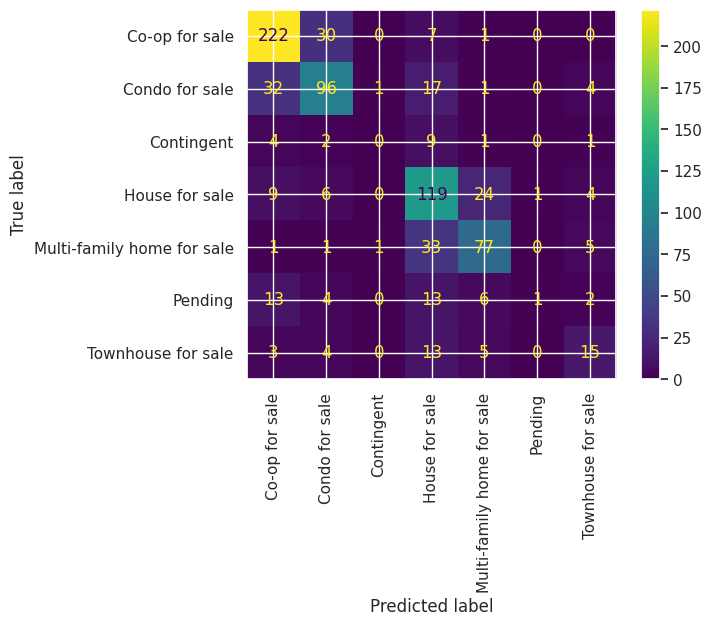

In [ ]:
y_pred = clf.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clf.classes_, xticks_rotation='vertical')

In [ ]:
print(classification_report(y_test, y_pred))

                            precision    recall  f1-score   support

            Co-op for sale       0.78      0.85      0.82       260
            Condo for sale       0.67      0.64      0.65       151
                Contingent       0.00      0.00      0.00        17
            House for sale       0.56      0.73      0.64       163
Multi-family home for sale       0.67      0.65      0.66       118
                   Pending       0.50      0.03      0.05        39
        Townhouse for sale       0.48      0.38      0.42        40

                  accuracy                           0.67       788
                 macro avg       0.52      0.47      0.46       788
              weighted avg       0.65      0.67      0.65       788



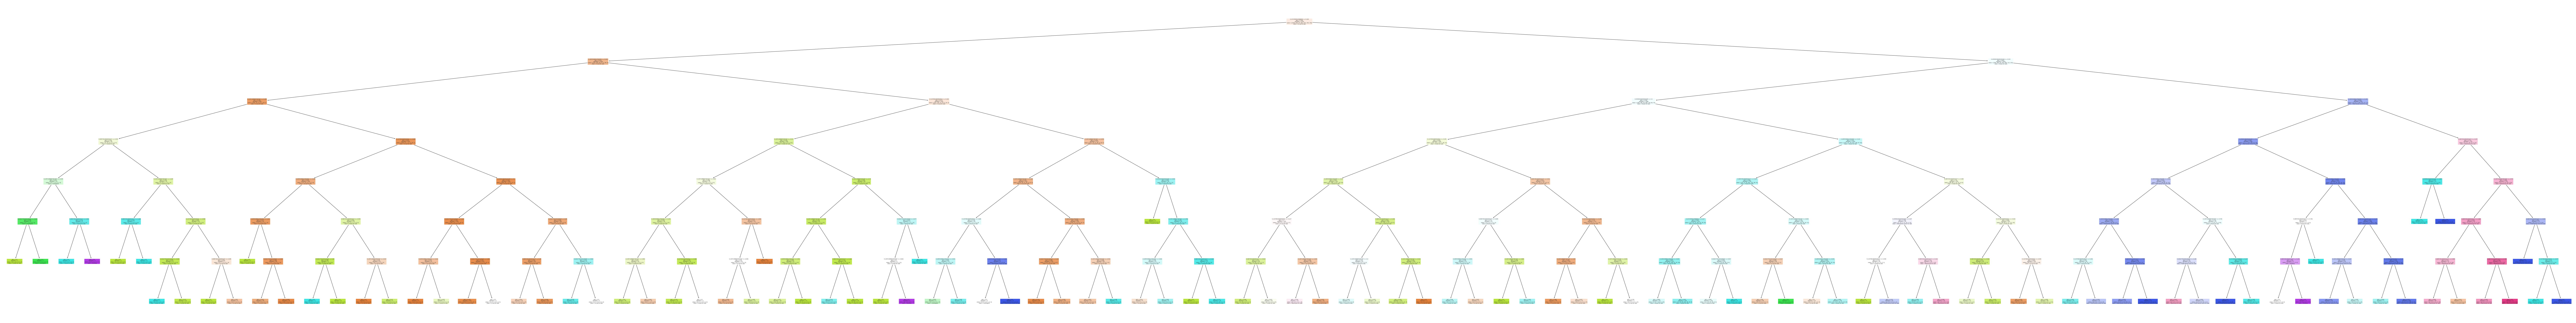

In [ ]:
plt.figure(figsize=(200, 25))
tree.plot_tree(clf, feature_names=clf.feature_importances_, class_names=clf.classes_, rounded=True, filled=True)
plt.show()



---


# **4 Метод**
# **Классификация (Работает)**
# **Случайный лес**


---



In [ ]:
df = df_copy.copy(deep=True)

In [ ]:
enc = OrdinalEncoder(dtype=int)
df[['BROKERTITLE']] = enc.fit_transform(df[['BROKERTITLE']])

In [ ]:
x = df.drop('TYPE', axis=1)
y = df['TYPE']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=57, stratify=y)

x_train = scaler_s.fit_transform(x_train, y_train)
x_test = scaler_s.transform(x_test)

rfc = RandomForestClassifier(random_state=8, max_depth=21)
rfc.fit(x_train, y_train)
print('Точность предсказания случайного леса: ', rfc.score(x_test, y_test))

Точность предсказания случайного леса:  0.6895093062605753


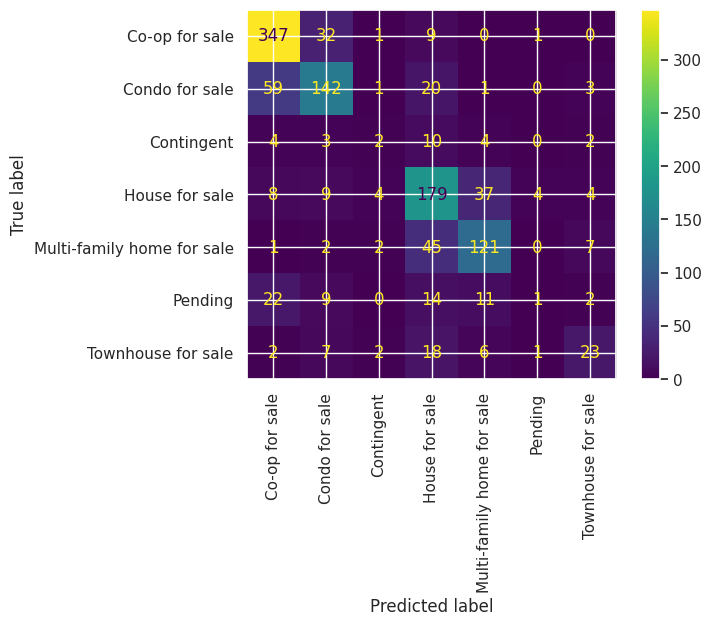

In [ ]:
y_pred = rfc.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=rfc.classes_, xticks_rotation='vertical')

In [ ]:
print(classification_report(y_test, y_pred))

                            precision    recall  f1-score   support

            Co-op for sale       0.78      0.89      0.83       390
            Condo for sale       0.70      0.63      0.66       226
                Contingent       0.17      0.08      0.11        25
            House for sale       0.61      0.73      0.66       245
Multi-family home for sale       0.67      0.68      0.68       178
                   Pending       0.14      0.02      0.03        59
        Townhouse for sale       0.56      0.39      0.46        59

                  accuracy                           0.69      1182
                 macro avg       0.52      0.49      0.49      1182
              weighted avg       0.66      0.69      0.67      1182





---


# **5 Метод**
# **Кластеризация (Работает)**
# **PCA и DBSCAN**


---



In [ ]:
df = df_copy.copy(deep=True)

x_col = ['BROKERTITLE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'PRICE']
df = df[x_col].copy(deep=True)

In [ ]:
enc = OrdinalEncoder()
df[['BROKERTITLE']] = enc.fit_transform(df[['BROKERTITLE']])

enc = OneHotEncoder()
res = enc.fit_transform(df[['TYPE']])
df[enc.categories_[0]] = res.toarray()
del df['TYPE']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [ ]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())


         P1        P2
0  0.039128  0.936478
1 -0.534006 -0.301995
2  0.135099  0.852512
3 -0.624146 -0.400197
4 -0.049632  0.896804


In [ ]:
for j in range(35, 75, 1):
    for i in range(1, 100):
        db_new = DBSCAN(eps = j / 1000, min_samples = i).fit(X_principal)
        labels = db_new.labels_
        myset = set(labels)
        if len(myset) == 4:
            print(f'eps: {j / 1000}  min_samples: {i}')

In [ ]:
db_new = DBSCAN(eps = 0.063, min_samples = 3).fit(X_principal)
labels = db_new.labels_

myset = set(labels)
print(myset)

{0, 1, 2, -1}


In [ ]:
a_part_of_color = ['20', '80', 'E0']
b_part_of_color = ['20','80', 'E0']
c_part_of_color = ['20','80', 'E0']
using_color = []
def get_color():
    color = '#' + rnd.choice(a_part_of_color) + rnd.choice(b_part_of_color) + rnd.choice(c_part_of_color)
    if color not in using_color:
        using_color.append(color)
        return color
    else:
        return get_color()

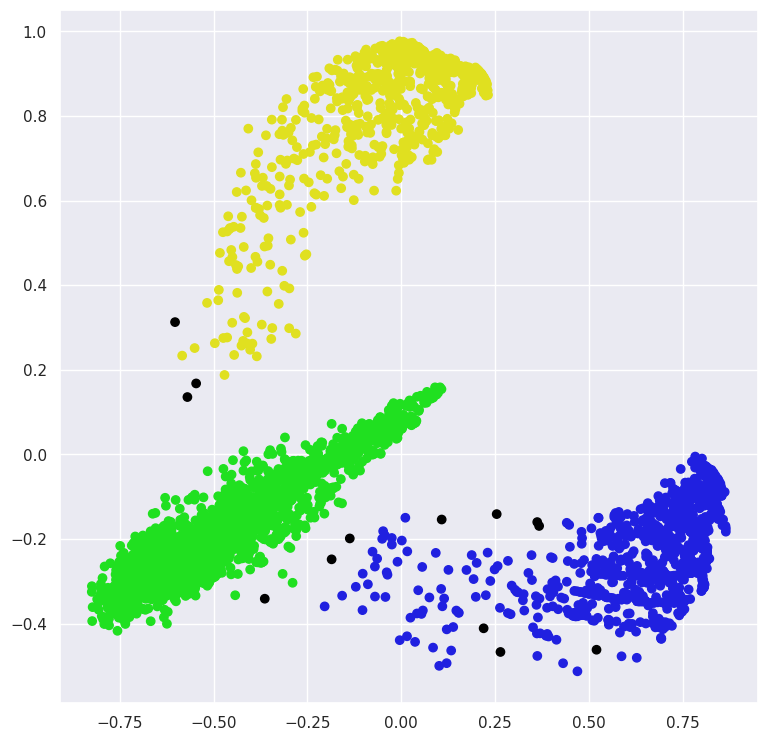

In [ ]:
using_color = []
colours = {}
for i in set(labels):
    colours[i] = get_color()
colours[-1] = '#000000'

cvec = [colours[label] for label in labels]

plt.figure(figsize = (7, 7))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.show()


In [ ]:
stat_df = df_copy.copy(deep=True)
fig = go.Figure(go.Scattermapbox(lat=stat_df['LATITUDE'],
                                 lon=stat_df['LONGITUDE'],
                                 text='Фирма брокера: ' + stat_df['BROKERTITLE'] + '<br>' \
                                 + 'Количество спален: ' + stat_df['BEDS'].astype(str) + '<br>' \
                                 + 'Количество ванных: ' + stat_df['BATH'].astype(int).astype(str) + '<br>' \
                                 + 'Площадь: ' + stat_df['PROPERTYSQFT'].astype(str) + '<br>' \
                                 + 'Цена: ' + stat_df['PRICE'].astype(str) + '$',
                                 marker=dict(color=cvec,
                                             size=7)))

map_center = go.layout.mapbox.Center(lat=(stat_df['LATITUDE'].max()+stat_df['LATITUDE'].min())/2,
                                     lon=(stat_df['LONGITUDE'].max()+stat_df['LONGITUDE'].min())/2)

fig.update_layout(legend_orientation='h',
                  mapbox_style='carto-positron',
                  mapbox=dict(center=map_center, zoom=10),
                  margin={"r":0,"t":0,"l":0,"b":0},
                  hoverlabel=dict(bgcolor="white",
                                  font_size=16,
                                  font_family="Inter"))
fig.show()
